# Notebook 1
Jose Castillo
## Setup

In [1]:
# Install required libraries (run this once if needed)
%pip install numpy pandas matplotlib
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # needed to register the 3D projection
from matplotlib import cm



M = [0.6, 0.8, 1.0, 1.2, 1.4, 1.6, 1.8, 2.0, 2.2, 2.4]
L = [0.15, 0.35, 1.00, 2.30, 4.10, 7.00, 11.2, 17.5, 25.0, 35.0]

Note: you may need to restart the kernel to use updated packages.


## Dataset visualization

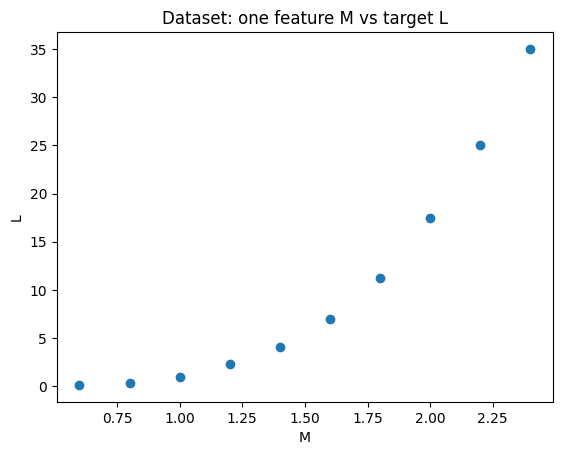

In [2]:
plt.figure()
plt.scatter(M,L)
plt.xlabel("M")
plt.ylabel("L")
plt.title("Dataset: one feature M vs target L")
plt.show()

The relationship between stellar mass (M) and luminosity (L) shown in the plot is clearly non-linear, and it kinda looks like a quadratic.

This behavior is physically plausible, as stellar luminosity follows a power-law dependence on mass rather than a linear one.

## Model and loss

### Prediction

In [ ]:
def predict(x_list, w, b):
    """Compute predicted y values for a list of x, using f_{w,b}(x) = w x + b."""
    y_hat_list = []
    for i in range(len(x_list)):
        y_hat_list.append(w * x_list[i] + b)
    return y_hat_list

w_test = 0.0
b_test = 0.0
y_hat_test = predict(M, w_test, b_test)
print("Predictions with w=0, b=0:", y_hat_test)


Predictions with w=0, b=0: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


### Mean squared error

In [ ]:
def compute_cost(x_list, y_list, w, b):
    """Compute the cost J(w,b) using explicit loops."""
    m_local = len(x_list)
    total = 0.0
    for i in range(m_local):
        f_wb = w * x_list[i] + b
        diff = f_wb - y_list[i]
        total += diff * diff
    cost = total / (2 * m_local)
    return cost

print("Cost with w=0, b=0:", compute_cost(M, L, w_test, b_test))

Cost with w=0, b=0: 117.69675


## Cost Surface

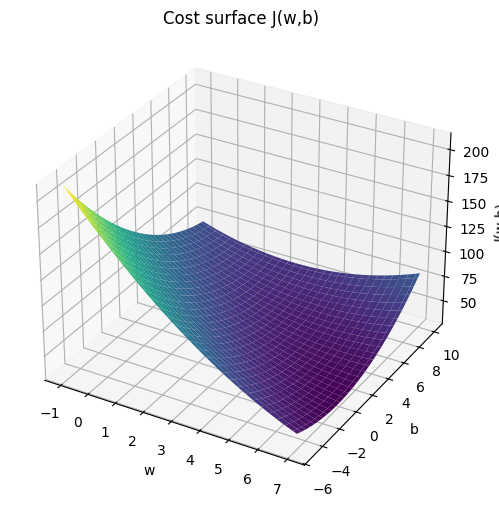

In [ ]:
# Choose reasonable ranges around the expected optimum
w_values = [float(v) for v in np.linspace(-1.0, 7.0, 60)]
b_values = [float(v) for v in np.linspace(-5.0, 10.0, 60)]

# Build W, B, J_vals as lists of lists using explicit loops
W = []
B = []
J_vals = []

for i in range(len(b_values)):  # rows: b
    row_W = []
    row_B = []
    row_J = []
    for j in range(len(w_values)):  # cols: w
        w_curr = w_values[j]
        b_curr = b_values[i]
        row_W.append(w_curr)
        row_B.append(b_curr)
        j_val = compute_cost(M, L, w_curr, b_curr)
        row_J.append(j_val)
    W.append(row_W)
    B.append(row_B)
    J_vals.append(row_J)

W_arr = np.array(W)
B_arr = np.array(B)
J_arr = np.array(J_vals)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")
ax.plot_surface(W_arr, B_arr, J_arr, cmap=cm.viridis, linewidth=0, antialiased=True)
ax.set_xlabel("w")
ax.set_ylabel("b")
ax.set_zlabel("J(w,b)")
ax.set_title("Cost surface J(w,b)")
plt.show()

The minimum of the cost surface represents the optimal parameters 𝑤 and 𝑏 that minimize the mean squared error between the predicted and true luminosities. Due to the convex shape of the surface, this minimum is global and unique.

## Gradients

In [ ]:
def compute_gradients(x_list, y_list, w, b):
    """Compute dJ/dw and dJ/db using explicit loops."""
    m_local = len(x_list)
    sum_dw = 0.0
    sum_db = 0.0

    for i in range(m_local):
        f_wb = w * x_list[i] + b
        error = f_wb - y_list[i]
        sum_dw += error * x_list[i]
        sum_db += error

    dj_dw = sum_dw / m_local
    dj_db = sum_db / m_local
    return dj_dw, dj_db

dj_dw_test, dj_db_test = compute_gradients(M, L, w_test, b_test)
print("Gradients at w=0, b=0:", dj_dw_test, dj_db_test)

Gradients at w=0, b=0: -21.523000000000003 -10.36


## Gradient descent (non-vectorized)

In [ ]:

def gradient_descent_non(x_list, y_list, w_init, b_init, alpha, num_iterations):
    """Run gradient descent using explicit loops for gradients and cost."""
    w = w_init
    b = b_init
    history_iterations = []
    history_costs = []

    for i in range(num_iterations):
        dj_dw, dj_db = compute_gradients(x_list, y_list, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        cost = compute_cost(x_list, y_list, w, b)
        history_iterations.append(i)
        history_costs.append(cost)

        if i % max(1, (num_iterations // 10)) == 0:
            print(f"Iteration {i:4d}: w={w:7.4f}, b={b:7.4f}, cost={cost:8.4f}")

    return w, b, history_iterations, history_costs

alpha = 0.01
num_iterations = 5000

w_init = 1.0
b_init = 1.0

w_learned, b_learned, it_hist, cost_hist = gradient_descent_non(M, L, w_init, b_init, alpha, num_iterations)
print("\nLearned parameters:")
print("w =", w_learned)
print("b =", b_learned)


Iteration    0: w= 1.1744, b= 1.0786, cost= 85.5063
Iteration  500: w=10.3758, b=-3.9872, cost= 20.4569
Iteration 1000: w=13.3013, b=-8.8344, cost= 13.9297
Iteration 1500: w=15.1231, b=-11.8530, cost= 11.3985
Iteration 2000: w=16.2576, b=-13.7327, cost= 10.4169
Iteration 2500: w=16.9641, b=-14.9033, cost= 10.0363
Iteration 3000: w=17.4041, b=-15.6322, cost=  9.8887
Iteration 3500: w=17.6781, b=-16.0862, cost=  9.8314
Iteration 4000: w=17.8487, b=-16.3688, cost=  9.8092
Iteration 4500: w=17.9549, b=-16.5449, cost=  9.8006

Learned parameters:
w = 18.020988748670277
b = -16.65433411133873


## Gradient descent (vectorized)

In [ ]:
def gradient_descent_vect(x, y, w_init, b_init, alpha, num_iterations):
    w = w_init
    b = b_init
    history = []

    for i in range(num_iterations):
        dj_dw, dj_db = compute_gradients(x, y, w, b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        cost = compute_cost(x, y, w, b)
        history.append((i, cost))

        if i % max(1, (num_iterations // 10)) == 0:
            print(f"Iteration {i:4d}: w={w:7.4f}, b={b:7.4f}, cost={cost:8.4f}")

    return w, b, history

alpha = 0.01
num_iterations = 5000

w_init = 0.0
b_init = 0.0

w_learned, b_learned, history = gradient_descent_vect(M, L, w_init, b_init, alpha, num_iterations)
print("\nLearned parameters:")
print("w =", w_learned)
print("b =", b_learned)

Iteration    0: w= 0.2152, b= 0.1036, cost=112.0896
Iteration  500: w=10.4849, b=-4.1680, cost= 20.1590
Iteration 1000: w=13.3693, b=-8.9470, cost= 13.8142
Iteration 1500: w=15.1655, b=-11.9231, cost= 11.3537
Iteration 2000: w=16.2840, b=-13.7764, cost= 10.3996
Iteration 2500: w=16.9805, b=-14.9305, cost= 10.0295
Iteration 3000: w=17.4143, b=-15.6491, cost=  9.8860
Iteration 3500: w=17.6844, b=-16.0967, cost=  9.8304
Iteration 4000: w=17.8526, b=-16.3754, cost=  9.8088
Iteration 4500: w=17.9574, b=-16.5490, cost=  9.8004

Learned parameters:
w = 18.022526963788536
b = -16.656882746208943


## Convergence 

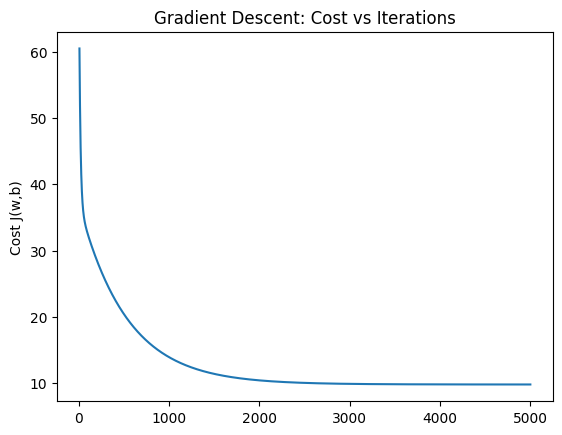

In [ ]:
plt.figure()
plt.plot(it_hist[10:], cost_hist[10:])
plt.ylabel("Cost J(w,b)")
plt.title("Gradient Descent: Cost vs Iterations")
plt.show()

## Experiments

In [ ]:
alpha = 0.001
w_learned, b_learned, history = gradient_descent_vect(M, L, w_init, b_init, alpha, num_iterations)
print("\nLearned parameters:")
print("w =", w_learned)
print("b =", b_learned)
print("final cost =", history[-1][1])

Iteration    0: w= 0.0215, b= 0.0104, cost=117.1272
Iteration  500: w= 5.3949, b= 1.9691, cost= 36.6010
Iteration 1000: w= 6.7755, b= 1.5774, cost= 32.0220
Iteration 1500: w= 7.4387, b= 0.8093, cost= 29.9482
Iteration 2000: w= 7.9572, b= 0.0080, cost= 28.1255
Iteration 2500: w= 8.4318, b=-0.7683, cost= 26.4695
Iteration 3000: w= 8.8810, b=-1.5108, cost= 24.9631
Iteration 3500: w= 9.3088, b=-2.2194, cost= 23.5928
Iteration 4000: w= 9.7167, b=-2.8952, cost= 22.3462
Iteration 4500: w=10.1058, b=-3.5398, cost= 21.2123

Learned parameters:
w = 10.476122321423492
b = -4.153410861400841
final cost = 20.182845511691465


In [ ]:
alpha = 0.01
w_learned, b_learned, history = gradient_descent_vect(M, L, w_init, b_init, alpha, num_iterations)
print("\nLearned parameters:")
print("w =", w_learned)
print("b =", b_learned)
print("final cost =", history[-1][1])

Iteration    0: w= 0.2152, b= 0.1036, cost=112.0896
Iteration  500: w=10.4849, b=-4.1680, cost= 20.1590
Iteration 1000: w=13.3693, b=-8.9470, cost= 13.8142
Iteration 1500: w=15.1655, b=-11.9231, cost= 11.3537
Iteration 2000: w=16.2840, b=-13.7764, cost= 10.3996
Iteration 2500: w=16.9805, b=-14.9305, cost= 10.0295
Iteration 3000: w=17.4143, b=-15.6491, cost=  9.8860
Iteration 3500: w=17.6844, b=-16.0967, cost=  9.8304
Iteration 4000: w=17.8526, b=-16.3754, cost=  9.8088
Iteration 4500: w=17.9574, b=-16.5490, cost=  9.8004

Learned parameters:
w = 18.022526963788536
b = -16.656882746208943
final cost = 9.797208007283938


In [ ]:
alpha = 0.05
w_learned, b_learned, history = gradient_descent_vect(M, L, w_init, b_init, alpha, num_iterations)
print("\nLearned parameters:")
print("w =", w_learned)
print("b =", b_learned)
print("final cost =", history[-1][1])

Iteration    0: w= 1.0762, b= 0.5180, cost= 91.6326
Iteration  500: w=16.9901, b=-14.9462, cost= 10.0257
Iteration 1000: w=18.0240, b=-16.6593, cost=  9.7972
Iteration 1500: w=18.1204, b=-16.8190, cost=  9.7952
Iteration 2000: w=18.1294, b=-16.8339, cost=  9.7951
Iteration 2500: w=18.1302, b=-16.8353, cost=  9.7951
Iteration 3000: w=18.1303, b=-16.8354, cost=  9.7951
Iteration 3500: w=18.1303, b=-16.8355, cost=  9.7951
Iteration 4000: w=18.1303, b=-16.8355, cost=  9.7951
Iteration 4500: w=18.1303, b=-16.8355, cost=  9.7951

Learned parameters:
w = 18.130303029693454
b = -16.835454544444545
final cost = 9.795148484848486


### Conclusion

In this experiment, gradient descent was applied to a one-feature linear regression model using different learning rates. The results show that the learning rate has a significant impact on the convergence speed and final performance of the algorithm.

With a small learning rate (α = 0.001), the algorithm converges in a stable manner but does so very slowly, resulting in a relatively high final loss within the fixed number of iterations. Increasing the learning rate to α = 0.01 leads to much faster convergence and a substantially lower final loss. Using an even larger learning rate (α = 0.05) further accelerates convergence and achieves nearly the same minimum loss as α = 0.01 without causing instability.

The similar final loss values obtained for α = 0.01 and α = 0.05 indicate that the algorithm successfully reaches the global minimum of the cost function. Overall, these results demonstrate that gradient descent converges correctly for this problem and that choosing an appropriate learning rate is crucial for efficient and stable training.


## Final fit plot

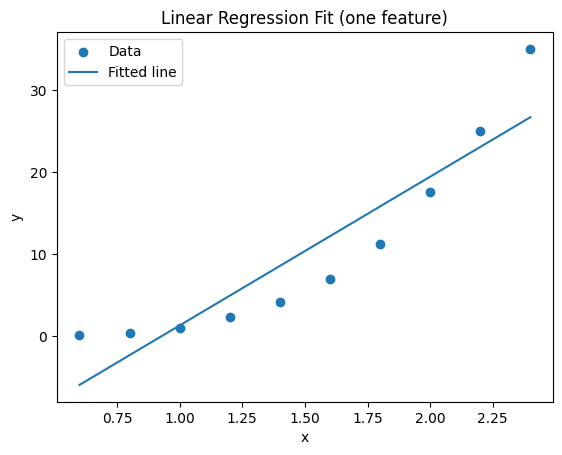

In [ ]:
plt.figure()
plt.scatter(M, L, label="Data")
y_pred = predict(M, w_learned, b_learned)
plt.plot(M, y_pred, label="Fitted line")
plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Regression Fit (one feature)")
plt.legend()
plt.show()


## Final Fit and Systematic Errors Discussion

The fitted linear regression captures the general increasing trend between mass and luminosity, but systematic deviations are evident. The model tends to overestimate luminosity at low mass values and underestimate it at higher masses. This indicates that the errors are not random but systematic.

These deviations occur because the true relationship between stellar mass and luminosity is non-linear. Therefore, the linear model provides only an approximate fit and cannot fully capture the curvature present in the data.


## Conceptual Questions

### Astrophysical meaning of *w*

In this linear regression model, the parameter *w* represents the rate at which stellar luminosity changes with stellar mass. Astrophysically, it can be interpreted as an average sensitivity of luminosity to mass within the limited range of data considered. A larger value of *w* indicates that small increases in stellar mass lead to larger increases in luminosity. However, this interpretation is only approximate, since the true physical relationship is not linear.

### Why is a linear model limited here?

A linear model is limited because the true relationship between stellar mass and luminosity follows a non-linear power-law relation rather than a linear one. As stellar mass increases, luminosity grows much faster than a straight-line relationship can represent. Consequently, a linear model cannot accurately capture the curvature of the data, leading to systematic errors, especially at higher mass values.
